[View in Colaboratory](https://colab.research.google.com/github/nhlakaniphom/Python/blob/master/Computer_Vision_1.ipynb)

## Images as data

In [0]:
import matplotlib.pyplot as plt

### Load the image

In [0]:
!mkdir images

In [0]:
!mv *.png images/

In [0]:
data = plt.imread('images/court of lions.jpg')

In [9]:
print(data)

[[[236 239 244]
  [237 240 245]
  [238 241 246]
  ...
  [111  61   8]
  [110  57  25]
  [109  56  24]]

 [[238 241 246]
  [237 240 245]
  [235 238 243]
  ...
  [115  65  12]
  [107  54  22]
  [106  53  21]]

 [[238 241 246]
  [237 240 245]
  [235 238 243]
  ...
  [118  68  15]
  [107  54  22]
  [106  53  21]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [143 169 184]
  [138 166 180]
  [138 166 180]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [141 167 182]
  [140 168 182]
  [140 168 182]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [139 165 180]
  [142 170 184]
  [142 170 184]]]


### To show the image

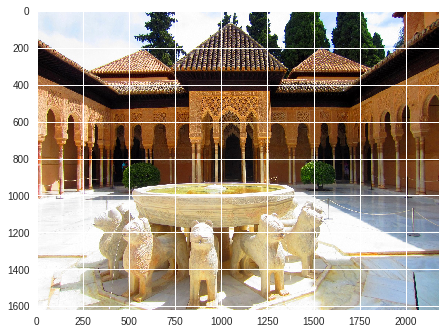

In [10]:
plt.imshow(data)
plt.show()

### The shape of an Image

In [0]:
data.shape

(1620, 2178, 3)

(Rows, Columns, color(RGB))

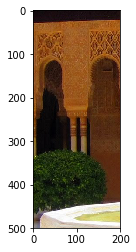

In [0]:
plt.imshow(data[500:1000,500:700])
plt.show()

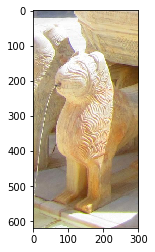

In [0]:
plt.imshow(data[1000:,400:700])
plt.show()

## Modifying image data

In [0]:
## Writting permission
data.setflags(write=1)

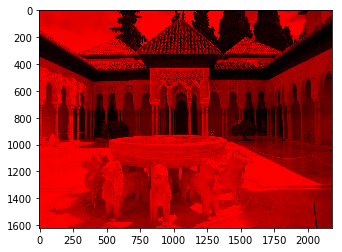

In [0]:
data[:, :, 1] = 0
data[:, :, 2] = 0
plt.imshow(data)
plt.show()

### Changing an image

In [0]:
data = plt.imread('images/court of lions.jpg')

In [0]:
## Writting permission
data.setflags(write=1)

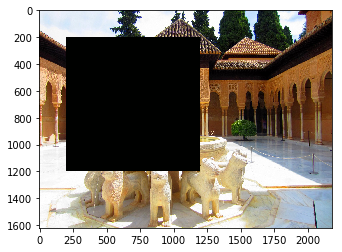

In [0]:
data[200:1200, 200:1200, :] = [0, 1, 0]
plt.imshow(data)
plt.show()

## Exe

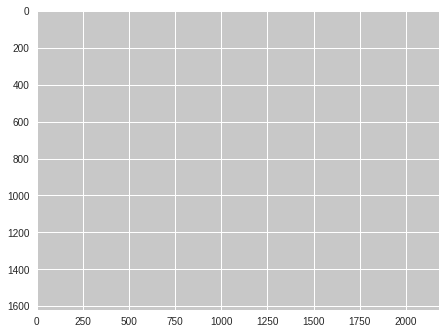

In [22]:
# Set the red channel in this part of the image to 1
data[:,:,0] = 200

# Set the green channel in this part of the image to 0
data[:,:,1] = 200

# Set the blue channel in this part of the image to 0
data[:,:,2] = 200

# Visualize the result
plt.imshow(data)
plt.show()

## Image classification with Keras

In [26]:
from IPython.display import HTML
HTML('<img src="images/fashion.jpg">')

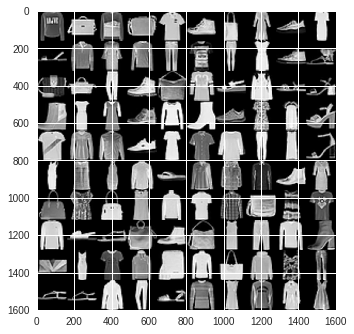

In [38]:
img = plt.imread('images/fashion.jpg')
plt.imshow(img)
plt.show()


In [0]:
import numpy as np

In [0]:
dataset = np.load("fashion.npz")

In [34]:
dataset.files

['arr_0']

In [0]:
dataset = dataset['arr_0']

In [0]:
test_data = (dataset.item()['test_data'])
train_data = (dataset.item()['train_data'])
test_labels = (dataset.item()['test_labels'])
train_labels = (dataset.item()['train_labels'])

In [37]:
## Build the Model
# Imports components from Keras
from keras.models import Sequential
from keras.layers import Dense

# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

Using TensorFlow backend.


In [0]:
# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

In [39]:
train_data.shape

(50, 28, 28, 1)

In [0]:
# Reshape the data to two-dimensional array
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1]*train_data.shape[2] )

In [41]:
train_data.shape

(50, 784)

In [42]:
train_labels[0]

array([0., 1., 0.])

In [45]:
# Fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 0s 4ms/step - loss: 1.1220 - acc: 0.1750 - val_loss: 1.1077 - val_acc: 0.4000
Epoch 2/3
40/40 [==============================] - 0s 280us/step - loss: 1.0181 - acc: 0.4000 - val_loss: 1.0768 - val_acc: 0.4000
Epoch 3/3
40/40 [==============================] - 0s 191us/step - loss: 0.9659 - acc: 0.4000 - val_loss: 1.0279 - val_acc: 0.3000


In [46]:
# Reshape test data
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1]*test_data.shape[2])

# Evaluate the model
model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 212us/step


[0.945576012134552, 0.30000001192092896]

In [47]:
model.metrics_names

['loss', 'acc']

## Convolutions
CNN’s make use of filters (also known as kernels), to detect what features, such as **edges**, are present throughout an image. A filter is just a matrix of values, called weights, that are trained to detect specific features. The filter moves over each part of the image to check if the feature it is meant to detect is present.

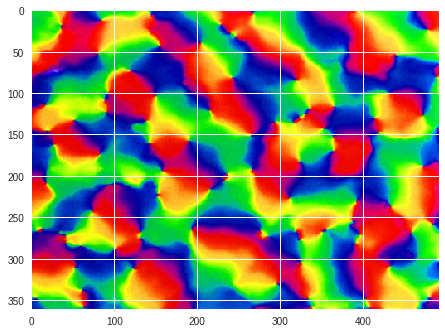

In [48]:
from IPython.display import HTML
HTML('<img src="images/Image_pixel.jpg">')
img = plt.imread('images/Image_pixel.jpg')
plt.imshow(img)
plt.show()

**Using correlations in images:**
* Natural images contain spatial correlations
* For example, pixels along a contour or edge 
* How can we use these correlations?

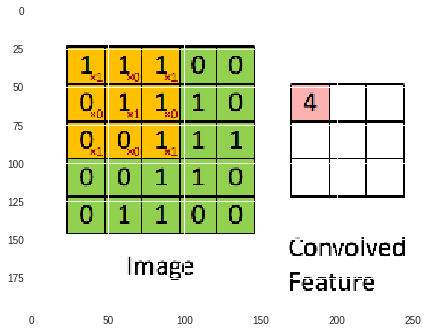

In [49]:
from IPython.display import HTML
HTML('<img src="images/convolution_schematic.gif">')
img = plt.imread('images/convolution_schematic.gif')
plt.imshow(img)
plt.show()

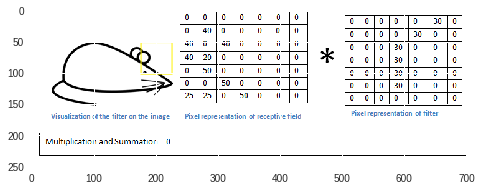

In [50]:
from IPython.display import HTML
HTML('<img src="images/Conv_example.png">')
img = plt.imread('images/Conv_example.png')
plt.imshow(img)
plt.show()

In [51]:
import numpy as np

array = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
kernel = np.array([-1, 1])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+2]).sum()

print(conv)

[0 0 0 0 1 0 0 0 0]


In [52]:
array = np.array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0])
kernel = np.array([-1, 1])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+2]).sum()
print(conv)

[ 0  1  0 -1  0  1  0 -1  0]


In [0]:
data = plt.imread('images/court of lions.jpg')

In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [0]:
data = rgb2gray(data)

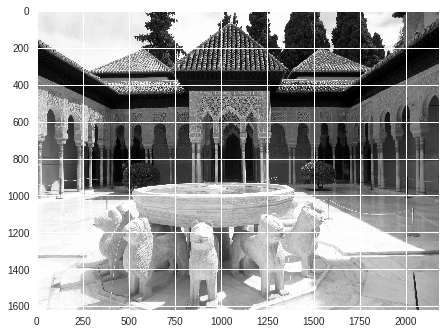

In [56]:
plt.imshow(data, cmap='gray')
plt.show()

In [57]:
data.shape

(1620, 2178)

In [0]:
def convImage(image, kernel):
    rows = image.shape[0]
    cols = image.shape[1]
    conv = np.zeros((rows, cols))
    for ii in range(rows):
        for jj in range(cols):
            window = image[ii:ii+2, jj:jj+2]
            conv[ii, jj] = np.sum(window * kernel)
    return conv

In [0]:
kernel = np.array([[-1, 1],
                   [-1, 1]])
conv = convImage(data, kernel)


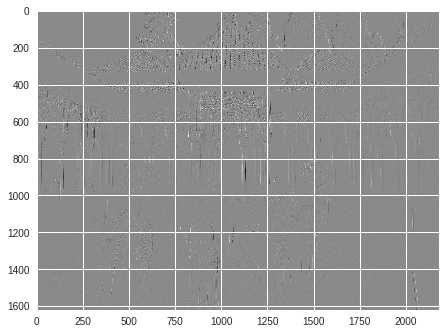

In [60]:
plt.imshow(conv, cmap='gray')
plt.show()

In [0]:
# Detects bright pixels over dark pixels. 
horizontal_line_conv = [[1, 1], 
                        [-1, -1]]
conv = convImage(data, horizontal_line_conv)

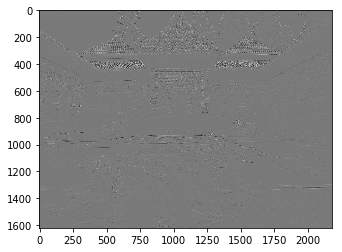

In [0]:
plt.imshow(conv, cmap='gray')
plt.show()

In [0]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (____ * array[____:____+____]).sum()

# Print conv
print(conv)

Double click to check the answer

<!--
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()


print(conv)
-->

In [0]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (____[ii:ii+3, jj:____+____] * ____).____

# Print result
print(result)

Double click to check the answer

<!--
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()
print(result)
-->

# Implementing image convolutions in Keras

### Keras 'Convolution' layer


In [0]:
from keras.layers import Conv2D

Conv2D(10, kernel_size=3, activation='relu')

### Integrating convolution layers into a network

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [0]:
from IPython.display import HTML
HTML('<img src="images/10Conv.jpg">')

### Fitting CNN

In [0]:
test_data = (dataset.item()['test_data'])
train_data = (dataset.item()['train_data'])
test_labels = (dataset.item()['test_labels'])
train_labels = (dataset.item()['train_labels'])

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)
model.evaluate(test_data, test_labels)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 0s 575us/step - loss: 0.5503 - acc: 0.9750 - val_loss: 0.5405 - val_acc: 1.0000
Epoch 2/3
40/40 [==============================] - 0s 475us/step - loss: 0.4521 - acc: 0.9000 - val_loss: 0.5147 - val_acc: 1.0000
Epoch 3/3
10/10 [==============================] - 0s 300us/step


[0.4262896180152893, 0.8999999761581421]

### Using batch images

In [0]:
model.fit(train_data, train_labels, batch_size=10, validation_split=0.2, epochs=3)
model.evaluate(test_data, test_labels, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/3
40/40 [==============================] - 0s 725us/step - loss: 0.2848 - acc: 0.9250 - val_loss: 0.2794 - val_acc: 1.0000
Epoch 2/3
40/40 [==============================] - 0s 625us/step - loss: 0.1950 - acc: 0.9750 - val_loss: 0.1972 - val_acc: 1.0000
Epoch 3/3
10/10 [==============================] - 0s 600us/step


[0.20641379058361053, 1.0]

## Tweaking your convolutions

In [0]:
from IPython.display import HTML
HTML('<img src="images/padding_strides.gif">')

In [0]:
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)), padding='valid')

**Zero Padding**

In [0]:
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)), padding='same')

**Strides**

In [0]:
model.add(Conv2D(10, kernel_size=3, activation='relu',input_shape=(img_rows, img_cols, 1)),strides=1)

In [0]:
model.add(Conv2D(10, kernel_size=3, activation='relu',input_shape=(img_rows, img_cols, 1)),strides=2)

**Calculating the size of the output**

$O = ((I − K + 2P)/S) + 1$

where

$I$ = size of the input

$K$ = size of the kernel

$P$ = size of the zero padding

$S$ = strides


((28 − 3 + 2)/1) + 1 = 28

((28 - 3 + 0)/1) + 1 = 26

### Dilated convolutions

In [0]:
from IPython.display import HTML
HTML('<img src="images/dilated_conv.gif">')

In [0]:
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)), dilation_rate=2)

**Question**

Add padding to a CNN: Padding allows a convolutional layer to retain the resolution of the input into this layer.

In [0]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(img_rows, img_cols, 1), 
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

What is the size of the output for an input of size 256 by 256, with a kernel of size 4 by 4, padding of 1 and strides of 2?

## Going Deeper ^_^

In [0]:
from IPython.display import HTML
HTML('<img src="images/deeper_conv.jpg">')

In [0]:
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', input_shape=(28, 28, 1), padding='same'))
# Second convolutional layer
model.add(Conv2D(10, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

**Why do we want deep networks?**

In [0]:
from IPython.display import HTML
HTML('<img src="images/inception.png">')

**Features in early layers**

In [0]:
from IPython.display import HTML
HTML('<img src="images/first_layer.jpg">')

**Features in intermediate layers**

In [0]:
from IPython.display import HTML
HTML('<img src="images/inter_layer.jpg">')

**Features in late layers**

In [0]:
from IPython.display import HTML
HTML('<img src="images/las_layer.jpg">')

How deep?

* Depth comes at a computational cost
* May require more data

* The first convolutional layer is the input layer of the network. This should have 15 units with kernels of 2 by 2 pixels. It should have a 'relu' activation function. It can use the variables img_rows and img_cols to define its input_shape.

* The second convolutional layer receives its inputs from the first layer. It should have 5 units with kernels of 2 by 2 pixels. It should also have a 'relu' activation function.

In [0]:
img_rows = 28
img_cols = 28
test_data = (dataset.item()['test_data'])
train_data = (dataset.item()['train_data'])
test_labels = (dataset.item()['test_labels'])
train_labels = (dataset.item()['train_labels'])

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)), padding='same')


# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)), padding='same')

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

Double click to check the Answer

<!--
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
model = Sequential()
# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size= 2, activation='relu', input_shape= (img_rows, img_cols,1)))
# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size = 2, activation='relu'))
# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
-->

* Compile the model to use the categorical cross-entropy loss function and the Adam optimizer.

* Train the network with train_data for 3 epochs with batches of 10 images each.

* Use randomly selected 20% of the training data as validation data during training.

* Evaluate the model with test_data, use a batch size of 10.

In [0]:
# Compile model
model.____(optimizer=____, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model to training data 
model.____(____, ____, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

# Evaluate the model on test data
model.____(____, ____, batch_size=10)

Double Click to check the answer

<!--
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
# Fit the model to training data 
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)
# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)
-->

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 10)        50        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 10)        410       
_________________________________________________________________
flatten_4 (Flatten)          (None, 7290)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 21873     
Total params: 22,333
Trainable params: 22,333
Non-trainable params: 0
_________________________________________________________________


### Reducing parameters with pooling

In [0]:
from IPython.display import HTML
HTML('<img src="images/max_pooling.png">')

### Max pooling in Keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

model = Sequential()
model.add(Conv2D(5, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)))
# 2*2 MAX POOLING
model.add(MaxPool2D(2))

model.add(Conv2D(15, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)))
# 2*2 MAX POOLING
model.add(MaxPool2D(2))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(train_data, train_labels, validation_split=0.2, epochs=10, batch_size=10)

Train on 40 samples, validate on 10 samples
Epoch 1/10
40/40 [==============================] - 0s 1ms/step - loss: 0.6514 - acc: 0.8750 - val_loss: 0.6614 - val_acc: 0.8000
Epoch 2/10
40/40 [==============================] - 0s 1ms/step - loss: 0.5845 - acc: 0.9000 - val_loss: 0.6330 - val_acc: 0.8000
Epoch 3/10
40/40 [==============================] - 0s 1ms/step - loss: 0.5334 - acc: 0.9000 - val_loss: 0.6174 - val_acc: 0.8000
Epoch 4/10
40/40 [==============================] - 0s 1ms/step - loss: 0.4831 - acc: 0.9000 - val_loss: 0.5835 - val_acc: 0.8000
Epoch 5/10
40/40 [==============================] - 0s 1ms/step - loss: 0.4292 - acc: 0.9250 - val_loss: 0.5201 - val_acc: 0.8000
Epoch 6/10
40/40 [==============================] - 0s 1ms/step - loss: 0.3856 - acc: 0.9000 - val_loss: 0.4566 - val_acc: 0.8000
Epoch 7/10
40/40 [==============================] - 0s 1ms/step - loss: 0.3491 - acc: 0.9000 - val_loss: 0.4142 - val_acc: 0.9000
Epoch 8/10
40/40 [============================

In [0]:
model.evaluate(test_data, test_labels, batch_size=10)

10/10 [==============================] - 0s 700us/step


[0.3523702025413513, 0.8999999761581421]

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 15)        690       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 1128      
Total params: 1,868
Trainable params: 1,868
Non-trainable params: 0
_________________________________________________________________
